In [1]:
#PACOTES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTAÇÃO DO BANCO DE DADOS

terremotos=pd.read_csv('D:/Acadêmico/Docência/FUCAPE/Soluções em Ciências de Dados/Dados2 Terremotos.csv')

ANÁLISE DO BANCO DE DADOS

In [3]:
#Variáveis:

#time - Tempo em milissegundos.
#place - Localização geográfica.
#status - Representa o estado ou condição atual do evento, que pode ser revisado ou automático.
#tsunami - Relacionado a uma série de grandes ondas oceânicas, geralmente causadas por uma perturbação submarina, frequentemente associadas a terremotos.
#significance - Denota a importância ou nível de impacto do evento, que pode ser usado para avaliar as potenciais consequências.
#data_type - Especifica o tipo de dados referenciados.
#magnitudo - Refere-se à medição do tamanho ou intensidade de um terremoto, geralmente medido na escala Richter ou na escala de magnitude de momento.
#state - Representa a divisão administrativa ou estado onde ocorreu o evento, frequentemente aplicável a países específicos.
#longitude - Coordenada longitudinal
#latitude - Coordenada latitudinal
#depth - Profundidade do epicentro
#date - Data do evento em formato AAAA-MM-DD (Ano-Mês-Dia) HH:MM:SS.ffffff (Hora:Minutos:Segundos.Microssegundos) +00:00 (Tempo Universal Coordenado)

In [4]:
terremotos.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [5]:
terremotos.tail()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00
3445750,1690628937884,"35 km W of Karluk, Alaska",automatic,0,12,earthquake,0.90,Alaska,-155.051000,57.564800,250.000,2023-07-29 11:08:57.884000+00:00


In [6]:
terremotos.shape

(3445751, 12)

In [7]:
terremotos.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [8]:
terremotos.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [9]:
terremotos['date'] = pd.to_datetime(terremotos['date'].str[0:11])
terremotos.dtypes

time                     int64
place                   object
status                  object
tsunami                  int64
significance             int64
data_type               object
magnitudo              float64
state                   object
longitude              float64
latitude               float64
depth                  float64
date            datetime64[ns]
dtype: object

In [10]:
terremotos['year']=terremotos['date'].dt.year
terremotos[['date','year']].head()

,date,year
0,1990-01-01,1990
1,1990-01-01,1990
2,1990-01-01,1990
3,1990-01-01,1990
4,1990-01-01,1990


In [11]:
terremotos.nunique()

time            3428775
place            531130
status                6
tsunami               2
significance       1170
data_type            25
magnitudo           933
state               858
longitude        733599
latitude         518295
depth             78386
date              11879
year                 34
dtype: int64

In [12]:
terremotos.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth,date,year
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3445751,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01,2009-07-08 19:16:29.554381056,2.009023e+03
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01,1990-01-01 00:00:00,1.990000e+03
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00,2002-06-18 00:00:00,2.002000e+03
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00,2010-08-20 00:00:00,2.010000e+03
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01,2017-10-22 00:00:00,2.017000e+03
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02,2023-07-29 00:00:00,2.023000e+03
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01,NaN,9.437871e+00


In [13]:
terremotos.describe().T

,count,mean,min,25%,50%,75%,max,std
time,3445751.0,1247123563705.142578,631153353990.0,1024401029543.0,1282338053750.0,1508700590235.0,1690628937884.0,297629234369.379211
tsunami,3445751.0,0.000443,0.0,0.0,0.0,0.0,1.0,0.021053
significance,3445751.0,74.009735,0.0,13.0,33.0,81.0,2910.0,101.636415
magnitudo,3445751.0,1.774076,-9.99,0.91,1.46,2.3,9.1,1.291055
longitude,3445751.0,-101.28763,-179.9997,-146.4274,-118.953833,-115.927667,180.0,76.974157
latitude,3445751.0,37.46483,-84.422,34.064,37.935667,47.848,87.386,20.415765
depth,3445751.0,22.853874,-10.0,3.12,7.7,16.12,735.8,54.849379
date,3445751,2009-07-08 19:16:29.554381056,1990-01-01 00:00:00,2002-06-18 00:00:00,2010-08-20 00:00:00,2017-10-22 00:00:00,2023-07-29 00:00:00,NaN
year,3445751.0,2009.022934,1990.0,2002.0,2010.0,2017.0,2023.0,9.437871


In [14]:
print(terremotos['status'].value_counts())

print('-----------------------------------------')
print(terremotos['tsunami'].value_counts())

print('-----------------------------------------')
print(terremotos['data_type'].value_counts())

status
reviewed     3224825
automatic     205714
REVIEWED       14093
AUTOMATIC       1107
manual             8
MANUAL             4
Name: count, dtype: int64
-----------------------------------------
tsunami
0    3444223
1       1528
Name: count, dtype: int64
-----------------------------------------
data_type
earthquake                    3361846
quarry blast                    38865
explosion                       26571
ice quake                       13838
mining explosion                 2177
other event                      1706
chemical explosion                314
rock burst                        182
sonic boom                        104
nuclear explosion                  56
mine collapse                      20
volcanic eruption                  17
quarry                             15
not reported                       12
experimental explosion              9
landslide                           8
acoustic noise                      2
rockslide                           2
Ice

In [15]:
terremotos['status'] = terremotos['status'].str.capitalize()
#terremotos['status'] = terremotos['status'].str.upper()  #letras maiúsculas
#terremotos['status'] = terremotos['status'].str.lower()  #letras minúsculas

print(terremotos['status'].value_counts())

status
Reviewed     3238918
Automatic     206821
Manual            12
Name: count, dtype: int64


In [16]:
terremotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   time          int64         
 1   place         object        
 2   status        object        
 3   tsunami       int64         
 4   significance  int64         
 5   data_type     object        
 6   magnitudo     float64       
 7   state         object        
 8   longitude     float64       
 9   latitude      float64       
 10  depth         float64       
 11  date          datetime64[ns]
 12  year          int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(4)
memory usage: 328.6+ MB


In [17]:
terremotos[['time','tsunami','significance','magnitudo','depth']].corr()

,time,tsunami,significance,magnitudo,depth
time,1.000000,0.018810,-0.079786,-0.119291,0.031901
tsunami,0.018810,1.000000,0.093231,0.057237,0.009602
significance,-0.079786,0.093231,1.000000,0.939378,0.363232
magnitudo,-0.119291,0.057237,0.939378,1.000000,0.356990
depth,0.031901,0.009602,0.363232,0.356990,1.000000


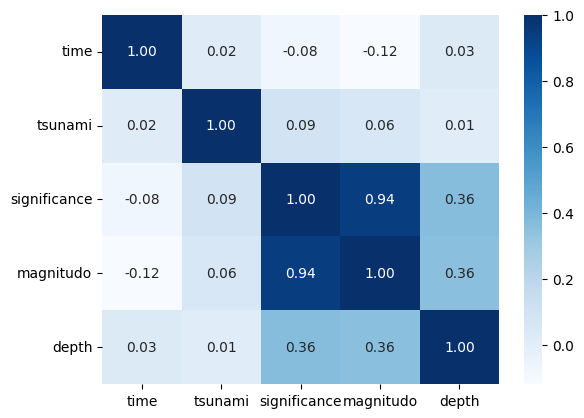

In [18]:
sns.heatmap(terremotos[['time','tsunami','significance','magnitudo','depth']].corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

GRÁFICOS

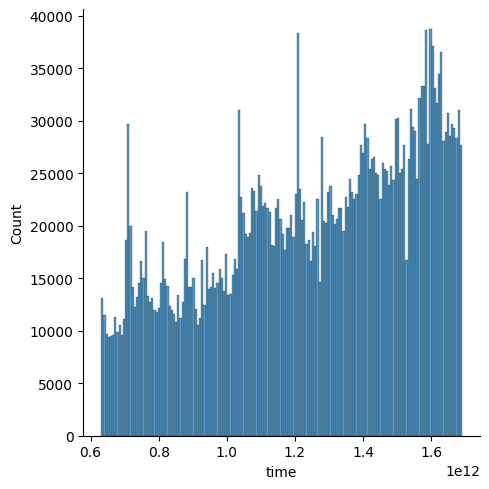

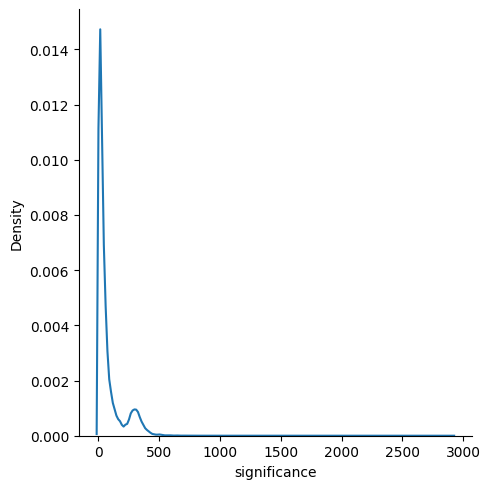

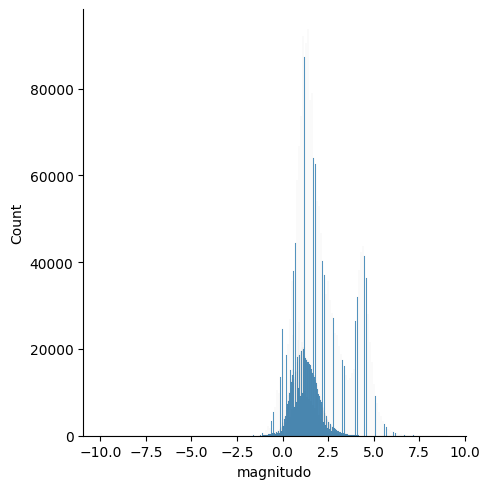

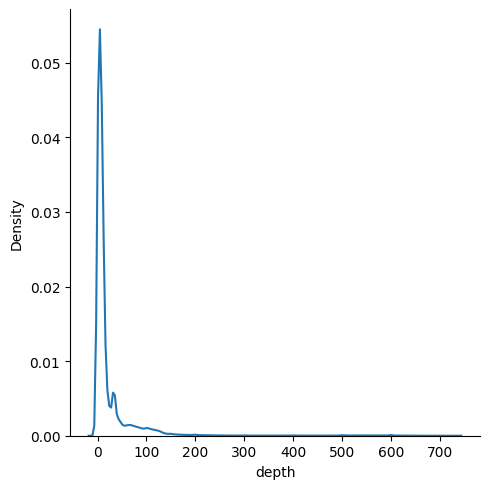

In [19]:
sns.displot(terremotos['time'],kind='hist')
plt.show()

sns.displot(terremotos['significance'],kind='kde')
#plt.xlim()
plt.show()

sns.displot(terremotos['magnitudo'],kind='hist')
#plt.xlim()
plt.show()

sns.displot(terremotos['depth'],kind='kde')
#plt.xlim()
plt.show()

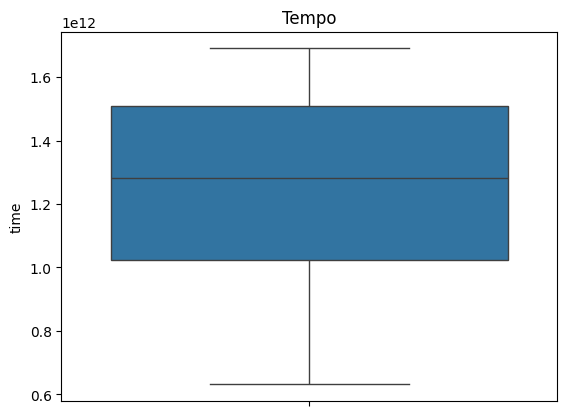

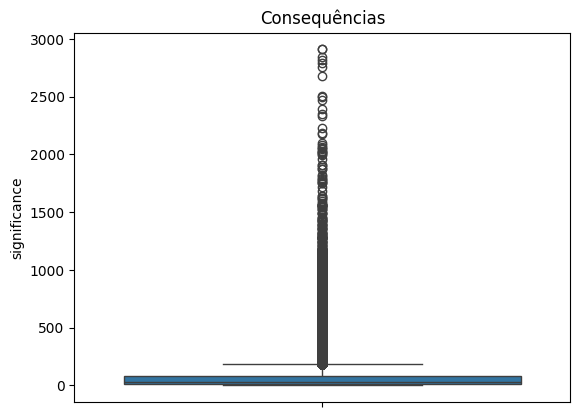

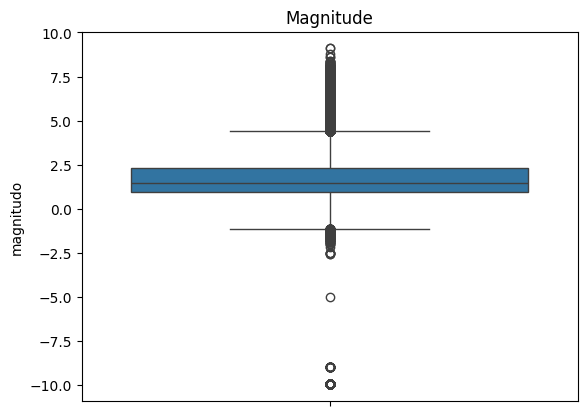

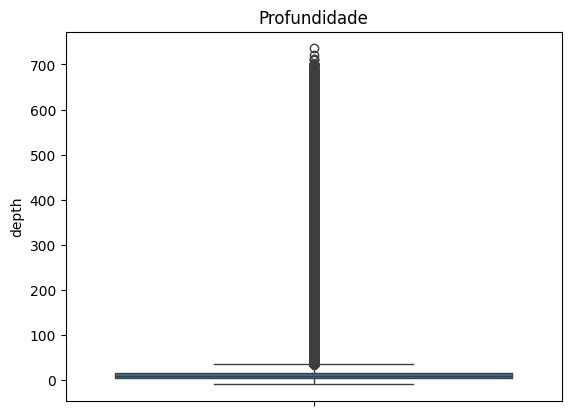

In [20]:
sns.boxplot(terremotos['time'])
plt.title('Tempo')
#plt.xlim()
plt.show()

sns.boxplot(terremotos['significance'])
plt.title('Consequências')
#plt.xlim()
plt.show()

sns.boxplot(terremotos['magnitudo'])
plt.title('Magnitude')
#plt.xlim()
plt.show()

sns.boxplot(terremotos['depth'])
plt.title('Profundidade')
#plt.xlim()
plt.show()

In [21]:
def perct_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    n_outliers = serie[(serie < lim_inf) | (serie > lim_sup)].shape[0]
    porcentagem_outliers = (n_outliers / serie.shape[0]) * 100
    return porcentagem_outliers

# Aplicando a função a múltiplas colunas
for coluna in ['time', 'significance','magnitudo', 'depth']:
    perct = perct_outliers(terremotos[coluna])
    print(f"Porcentagem de outliers em {coluna}: {perct}%")

Porcentagem de outliers em time: 0.0%
Porcentagem de outliers em significance: 13.337121573787543%
Porcentagem de outliers em magnitudo: 7.102950851643082%
Porcentagem de outliers em depth: 14.286551756061305%


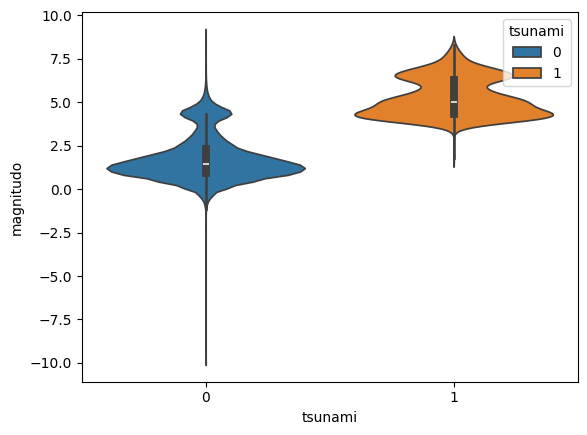

In [22]:
sns.violinplot(data=terremotos,x='tsunami',y='magnitudo',hue='tsunami')
plt.show()

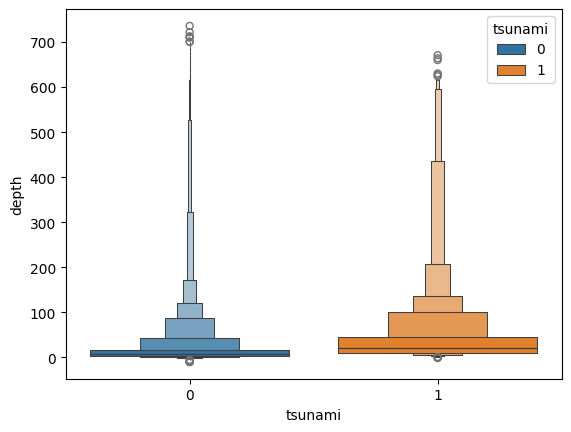

In [23]:
sns.boxenplot(data=terremotos,x='tsunami',y='depth',hue='tsunami')
plt.show()

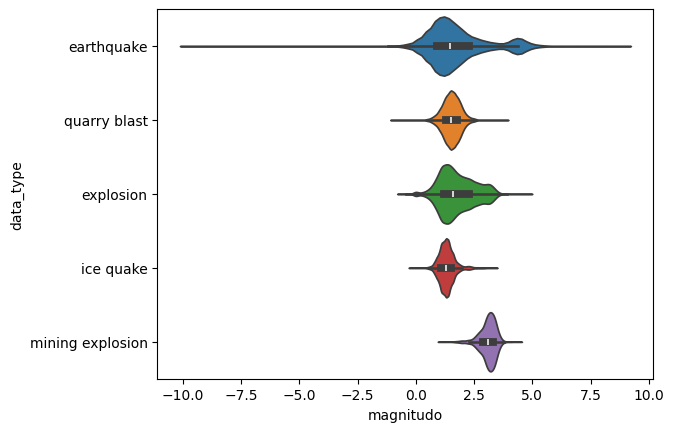

In [24]:
sns.violinplot(data=terremotos[terremotos['data_type'].isin(['earthquake','quarry blast','explosion','ice quake','mining explosion'])],x='magnitudo',y='data_type',hue='data_type')
plt.show()

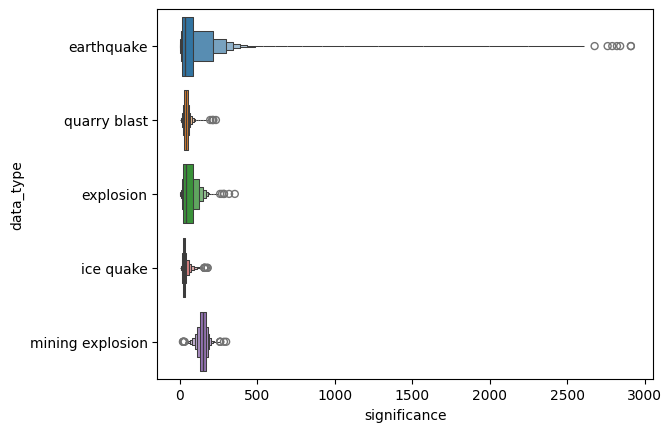

In [25]:
sns.boxenplot(data=terremotos[terremotos['data_type'].isin(['earthquake','quarry blast','explosion','ice quake','mining explosion'])],x='significance',y='data_type',hue='data_type')
plt.show()

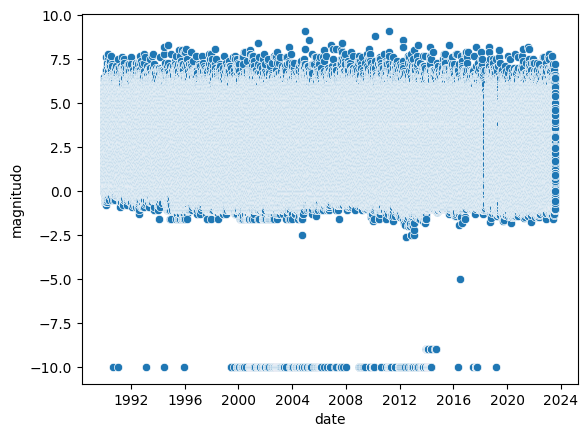

In [26]:
sns.scatterplot(data=terremotos,x='date',y='magnitudo')
plt.show()

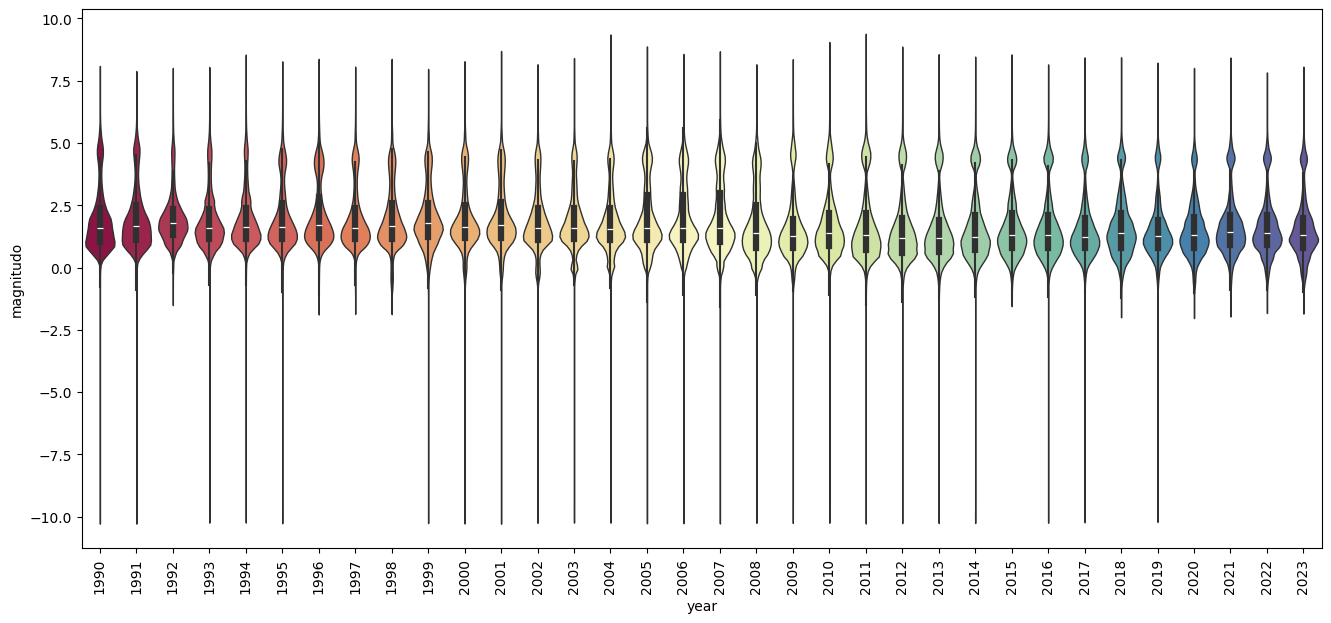

In [27]:
plt.figure(figsize=(16,7))
sns.violinplot(data=terremotos,x='year',y='magnitudo',hue='year',legend=False,palette='Spectral',linewidth=1)
plt.xticks(rotation=90)
plt.show()

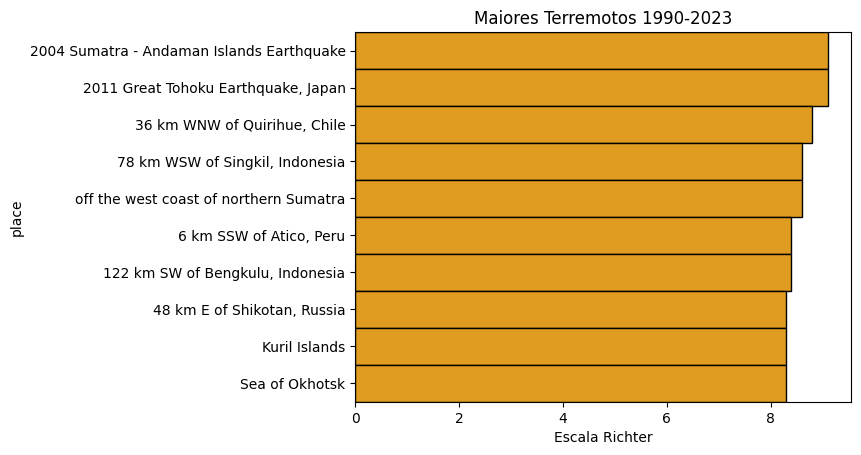

In [28]:
top_mag_place = terremotos.sort_values(by="magnitudo", ascending = False).head(10)
sns.barplot(data=top_mag_place,y='place',x="magnitudo", width=1, edgecolor="black",color = "orange")
plt.title("Maiores Terremotos 1990-2023")
plt.xlabel("Escala Richter")
plt.show()

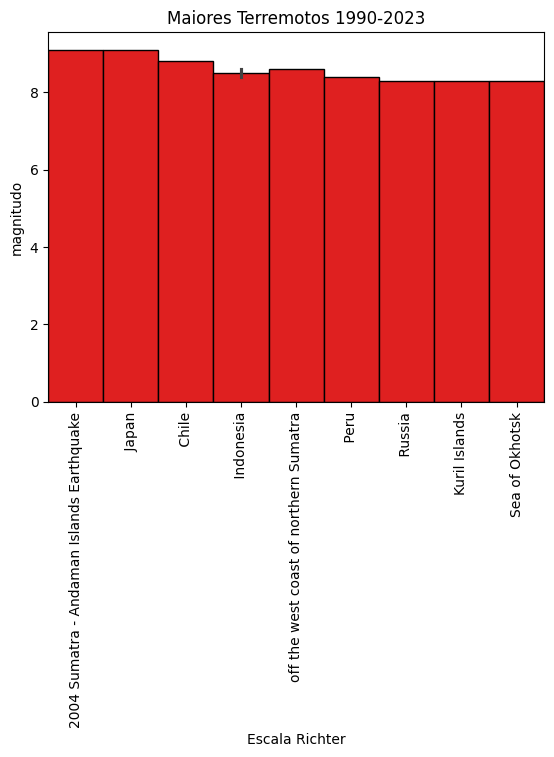

In [29]:
top_mag_state = terremotos.sort_values(by="magnitudo", ascending = False).head(10)
sns.barplot(data=top_mag_state,y='magnitudo',x="state", width=1, edgecolor="black",color = "red")
plt.title("Maiores Terremotos 1990-2023")
plt.xlabel("Escala Richter")
plt.xticks(rotation=90)
plt.show()

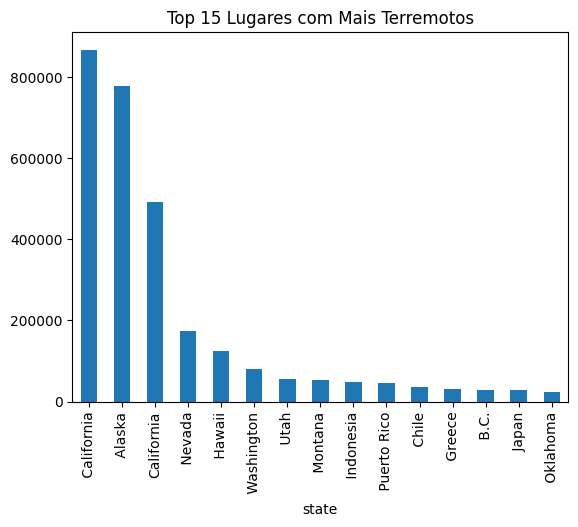

In [30]:
top_states=terremotos['state'].value_counts().head(15)
top_states.plot(kind='bar')
plt.title('Top 15 Lugares com Mais Terremotos')
plt.show()

In [31]:
top_states=top_states.reset_index()
top_states.columns=['state','count']

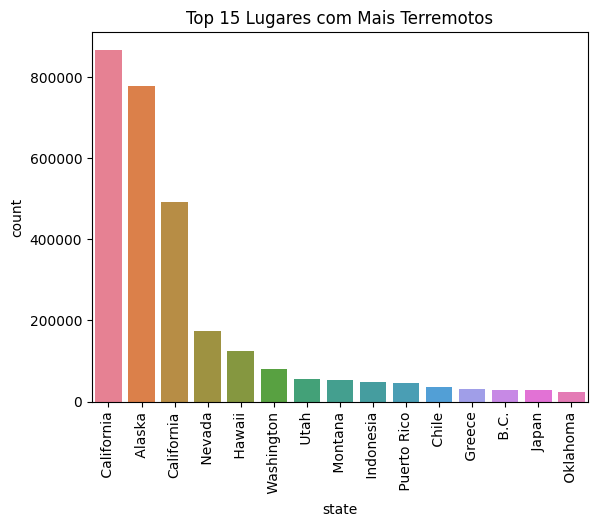

In [32]:
sns.barplot(data=top_states,x='state',y='count',hue='state')
plt.title('Top 15 Lugares com Mais Terremotos')
plt.xticks(rotation=90)
plt.show()

In [33]:
top_types=terremotos['data_type'].value_counts().head(10)
top_types=top_types.reset_index()
top_types.columns=['type','count']

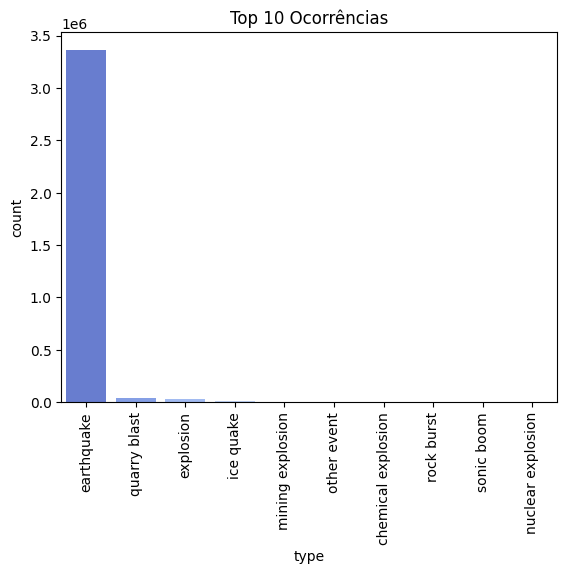

In [34]:
sns.barplot(data=top_types,x='type',y='count',hue='type',palette='coolwarm')
plt.title('Top 10 Ocorrências')
plt.xticks(rotation=90)
plt.show()

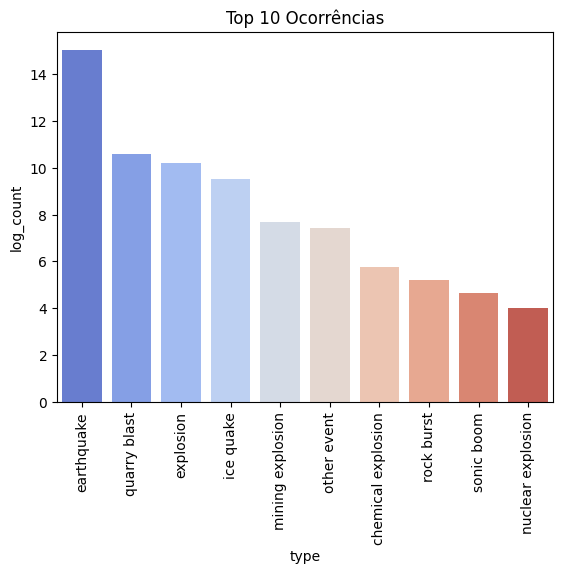

In [35]:
top_types['log_count']=np.log(top_types['count'])

sns.barplot(data=top_types,x='type',y='log_count',hue='type',palette='coolwarm')
plt.title('Top 10 Ocorrências')
plt.xticks(rotation=90)
plt.show()

In [36]:
top_years=terremotos['year'].value_counts()
top_years=top_years.reset_index()
top_years.columns=['year','count']

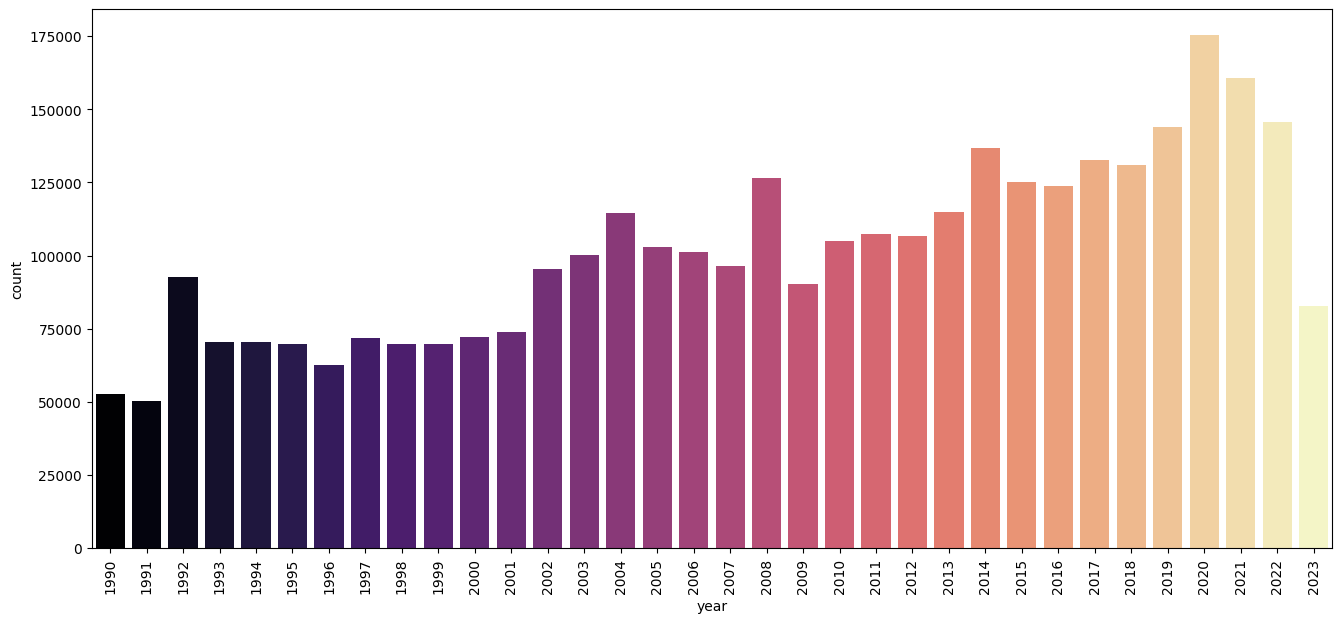

In [37]:
plt.figure(figsize=(16,7))
sns.barplot(data=top_years,x='year',y='count',hue='year',palette='magma',legend=False)
plt.xticks(rotation=90)
plt.show()

GRÁFICOS DE MAPA

In [38]:
#Pacotes Adicionais

import geopandas as gpd
import plotly.express as px

In [39]:
fig = px.density_mapbox(terremotos.loc[(terremotos['date']>='2023-07-01') & (terremotos['date']<='2023-07-10')],
                        lat='latitude', lon='longitude', z='magnitudo', radius=10,
                        center=dict(lat=0, lon=0), zoom=0.8,title ='Magnitude dos Terremotos em 07-2023')
fig.update_layout(mapbox_style="open-street-map",height=700)
fig.show()

COMPARAÇÕES ENTRE GRUPOS

In [40]:
terremotos.groupby('tsunami')[['time','significance','magnitudo','depth']].mean().T

tsunami,0,1
time,1.247006e+12,1.512923e+12
significance,7.381015e+01,5.238887e+02
magnitudo,1.772520e+00,5.282428e+00
depth,2.284278e+01,4.785911e+01


In [41]:
terremotos[terremotos['data_type'].isin(['earthquake', 'quarry blast', 'explosion', 'ice quake', 'mining explosion'])].groupby('data_type')[['time','tsunami','significance','magnitudo','depth']].mean()

,time,tsunami,significance,magnitudo,depth
data_type,,,,,
earthquake,1.247607e+12,0.000454,74.711079,1.778189,23.422736
explosion,1.210751e+12,0.000000,56.751007,1.764522,0.277564
ice quake,1.466927e+12,0.000000,29.153490,1.330279,0.139102
mining explosion,1.529831e+12,0.000000,148.732200,3.087689,0.008608
quarry blast,1.129240e+12,0.000000,38.095381,1.525175,-0.513832
